In [1]:
import earthaccess
import os
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from dotenv import load_dotenv

In [25]:
auth = earthaccess.login()


# Search for granules with the specified DOI and parameters

doi_code="10.5067/QJ7C8LRUZR8C"
start_date="2020-01-01"
end_date="2020-12-31"

results = earthaccess.search_data(
    doi="10.5067/QJ7C8LRUZR8C",  # DOI for GLDAS_NOAH10_M v2.1
    temporal=(start_date, end_date),  # Time range for the albedo dataset
    bounding_box=(-180, -90, 180, 90),  # Global bounding box
    short_name='GLDAS_NOAH10_M'  # Add short_name for filtering
)

fs = earthaccess.open(results)  # Get the URLs
print(fs)  # Check the retrieved file URLs

# Attempt to load into an Xarray dataset without Dask
try:
    ds = xr.open_mfdataset(fs, chunks=None)  # Load into an Xarray dataset
    print(ds)
except ValueError as e:
    print(f"Error loading dataset: {e}")

QUEUEING TASKS | :   0%|          | 0/12 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/12 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/12 [00:00<?, ?it/s]

[<File-like object HTTPFileSystem, https://data.gesdisc.earthdata.nasa.gov/data/GLDAS/GLDAS_NOAH10_M.2.1/2020/GLDAS_NOAH10_M.A202001.021.nc4>, <File-like object HTTPFileSystem, https://data.gesdisc.earthdata.nasa.gov/data/GLDAS/GLDAS_NOAH10_M.2.1/2020/GLDAS_NOAH10_M.A202002.021.nc4>, <File-like object HTTPFileSystem, https://data.gesdisc.earthdata.nasa.gov/data/GLDAS/GLDAS_NOAH10_M.2.1/2020/GLDAS_NOAH10_M.A202003.021.nc4>, <File-like object HTTPFileSystem, https://data.gesdisc.earthdata.nasa.gov/data/GLDAS/GLDAS_NOAH10_M.2.1/2020/GLDAS_NOAH10_M.A202004.021.nc4>, <File-like object HTTPFileSystem, https://data.gesdisc.earthdata.nasa.gov/data/GLDAS/GLDAS_NOAH10_M.2.1/2020/GLDAS_NOAH10_M.A202005.021.nc4>, <File-like object HTTPFileSystem, https://data.gesdisc.earthdata.nasa.gov/data/GLDAS/GLDAS_NOAH10_M.2.1/2020/GLDAS_NOAH10_M.A202006.021.nc4>, <File-like object HTTPFileSystem, https://data.gesdisc.earthdata.nasa.gov/data/GLDAS/GLDAS_NOAH10_M.2.1/2020/GLDAS_NOAH10_M.A202007.021.nc4>, <File

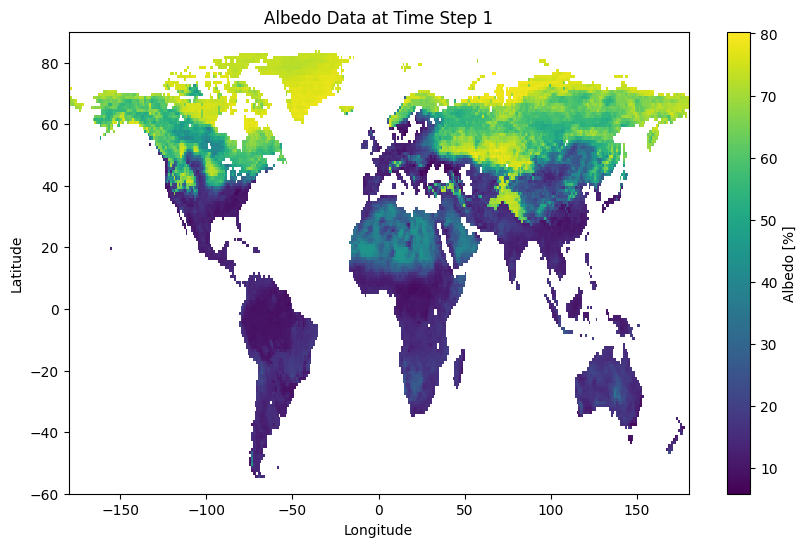

In [24]:

# Extract the albedo data
albedo_data = ds['Albedo_inst']  # Use the correct variable name

# Select a specific time point (e.g., the first time step)
albedo_at_time = albedo_data.isel(time=0)

# Plotting
plt.figure(figsize=(10, 6))
# Capture the return value of the plot
mappable = albedo_at_time.plot(cmap='viridis')  # Choose a colormap
plt.title('Albedo Data at Time Step 1')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Now create the colorbar using the mappable object
#plt.colorbar(mappable, label='Albedo')  # Pass the mappable object to colorbar
plt.show()


In [26]:
# Print the names of all variables in the dataset
print(ds.data_vars)


Data variables:
    time_bnds              (time, bnds) datetime64[ns] 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    Swnet_tavg             (time, lat, lon) float32 3MB dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Lwnet_tavg             (time, lat, lon) float32 3MB dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qle_tavg               (time, lat, lon) float32 3MB dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qh_tavg                (time, lat, lon) float32 3MB dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qg_tavg                (time, lat, lon) float32 3MB dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Snowf_tavg             (time, lat, lon) float32 3MB dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Rainf_tavg             (time, lat, lon) float32 3MB dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Evap_tavg              (time, lat, lon) float32 3MB dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qs

In [28]:
# Extract the albedo data (if not already done)
albedo_data = ds['Albedo_inst']  # Use the correct variable name

# Select a specific time point (e.g., the first time step)
albedo_at_time = albedo_data.isel(time=0)

# Convert to a DataFrame
albedo_df = albedo_at_time.to_dataframe().reset_index()

# Display the first few rows of the DataFrame

albedo_df.shape

albedo_df["Albedo_inst"].unique()




filename = 'albedo_data_2020_2.csv'

# Check if the file already exists
if not os.path.exists(filename):
    albedo_df.to_csv(filename, index=False)
    print(f"DataFrame saved as {filename}")
else:
    print(f"{filename} already exists. File not saved.")


DataFrame saved as albedo_data_2020_2.csv


In [88]:
#10.5067/AP1B0BA5PD2K

NameError: name 'AP1B0BA5PD2K' is not defined